In [8]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [14]:
FILE_PATH = '../data/'
df = pd.read_csv(f'{FILE_PATH}summary2.csv', encoding='UTF-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 3: invalid start byte

In [4]:
df[:3]

,ID,����,����Ʈ��Ƽ �о�,2���з�,Domain,Urban,SC,sensor,datatype,datacategory,...,�����͸�.1,�����ͳ���.1,��������,����������(����),����������,�м�����,�м����\r\n(Method),�м�����.1,�м���� �Һз�,������
0,1,NaN,12 ��Ÿ,NaN,NaN,NaN,NaN,NaN,3.0,Other processed,...,Agent Quality Properties,NaN,NaN,NaN,Metadata,Descriptive,NaN,NaN,NaN,NaN
1,2,03 Environment,04 ȯ��,������,Environment,Pollution,Sensor network,E,1.0,Environmental,...,Air Quality,air quality sensor data in ten locations,Environmental,NaN,�Ϲ�ȯ������,Predictive,Machine learning/CART classification technique,4.0,NaN,NaN
2,3,NaN,12 ��Ÿ,NaN,NaN,NaN,NaN,NaN,3.0,Other processed,...,Ontologies,ontologies found in related literature,NaN,NaN,Metadata,Descriptive,Literature review / ODP(Ontology Design Patter...,0.0,NaN,NaN


In [5]:
df3=df[['Domain','Urban']]
df4 = df3.dropna()

In [6]:
sr1 = df4['Domain'].unique()

In [7]:
sr2 = df4['Urban'].unique()

<ipython-input-8-6db4ce59dd7e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind=df4[df4['Domain']==x][df4['Urban']==y].shape[0]


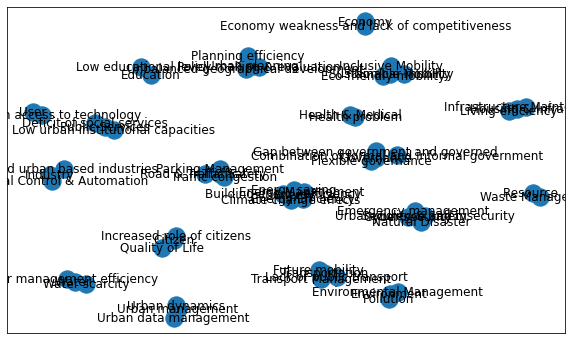

In [8]:
import networkx as nx
G_weighted = nx.Graph()
#G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)

for x in sr1:
    if(x is None):continue
    for y in sr2:
        ind=df4[df4['Domain']==x][df4['Urban']==y].shape[0]
        if (ind!=0): G_weighted.add_edge(x,y,weight=ind)
#        print(x,y,df4[df4['Domain']==x][df4['Urban']==y].shape[0])
        
nx.draw_networkx(G_weighted)     

In [9]:
df3=df[['Domain','Urban','datatype']]
df4 = df3.dropna()
ser3= df4['Domain'].unique()
ser4= df4['datatype'].unique()
dummies = DataFrame(np.zeros((ser3.size, ser4.size)), columns=ser4,index=ser3)

j=0
for index, row in df4.iterrows():
    dummies.loc[row['Domain'],row['datatype']]+=1
dummies

,1.0,4.0,3.0,5.0,2.0
Environment,9.0,2.0,0.0,1.0,0.0
Governance,0.0,6.0,1.0,0.0,0.0
Urban planning,0.0,1.0,11.0,0.0,0.0
Energy,13.0,1.0,5.0,8.0,0.0
Security & Safety,8.0,2.0,1.0,9.0,3.0
Urban management,3.0,3.0,1.0,0.0,2.0
Health & Medical,0.0,1.0,1.0,0.0,3.0
Transportation,4.0,1.0,1.0,2.0,3.0
Citizen,0.0,1.0,0.0,0.0,3.0
Housing & Infra,5.0,2.0,3.0,0.0,1.0


In [10]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(dummies.values, metric='euclidean')
#dist_matrix = squareform(distances)
dist_matrix = pd.DataFrame(squareform(distances), columns=ser3,index=ser3)

In [ ]:
dist_matrix

In [ ]:
dist_matrix2 = dist_matrix[dist_matrix<5] # apply threshold 5보다 가까운 것을 남김

In [ ]:
G_weighted2 = nx.Graph()
#G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)

for x in ser3:
    if(x is None):continue
    for y in ser3:
        ind=dist_matrix2[x][y]
        print(ind)
        if (ind is None):continue
        if (ind!=0): G_weighted2.add_edge(x,y,weight=ind)

In [ ]:
nx.draw_networkx(G_weighted2) 

In [ ]:
# between centrality
pos = nx.spring_layout(G_weighted2)
betCent = nx.betweenness_centrality(G_weighted2, normalized=True, endpoints=True)
node_color = [20000.0 * G_weighted2.degree(v) for v in G_weighted2]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_weighted2, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [ ]:
nx.degree(G_weighted2, 'Dev Anand')